In [1]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# 📂 Step 2: Load Dataset
# Make sure the file is in the current directory or specify the full path
column_names = ['letter', 'x-box', 'y-box', 'width', 'height', 'onpix', 'x-bar', 'y-bar',
                'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

df = pd.read_csv('OCR/letter-recognition.data', header=None, names=column_names)
df.head()

,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
# 🏷️ Step 3: Preprocess Data
X = df.drop('letter', axis=1)
y = df['letter']

# Encode labels (A-Z => 0-25)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# One-hot encode targets
y_onehot = to_categorical(y_encoded)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("X shape:", X_scaled.shape)
print("y shape (one-hot):", y_onehot.shape)

X shape: (20000, 16)
y shape (one-hot): (20000, 26)


In [4]:
# 🔀 Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42)

In [5]:
# 🧠 Step 5: Define Deep Neural Network
model = Sequential([
    Dense(128, input_shape=(16,), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(26, activation='softmax')  # 26 output classes (A-Z)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,122 (47.35 KB)

 Trainable params: 12,122 (47.35 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 🏋️ Step 6: Train the Model
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=30, 
                    batch_size=32)

Epoch 1/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2480 - loss: 2.6086 - val_accuracy: 0.6750 - val_loss: 1.1847
Epoch 2/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5767 - loss: 1.3599 - val_accuracy: 0.7337 - val_loss: 0.9168
Epoch 3/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6511 - loss: 1.1197 - val_accuracy: 0.7700 - val_loss: 0.7842
Epoch 4/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6900 - loss: 0.9760 - val_accuracy: 0.7984 - val_loss: 0.6979
Epoch 5/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7199 - loss: 0.8814 - val_accuracy: 0.8109 - val_loss: 0.6425
Epoch 6/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7374 - loss: 0.8096 - val_accuracy: 0.8322 - val_loss: 0.5837
Epoch 7/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7520 - loss: 0.7848 - val_accuracy: 0.8409 - val_loss: 0.5418
Epoch 8/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7639 - loss: 0.7419 - val_accuracy: 0.

In [7]:
# 📊 Step 7: Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9279 - loss: 0.2520
Test Accuracy: 0.93


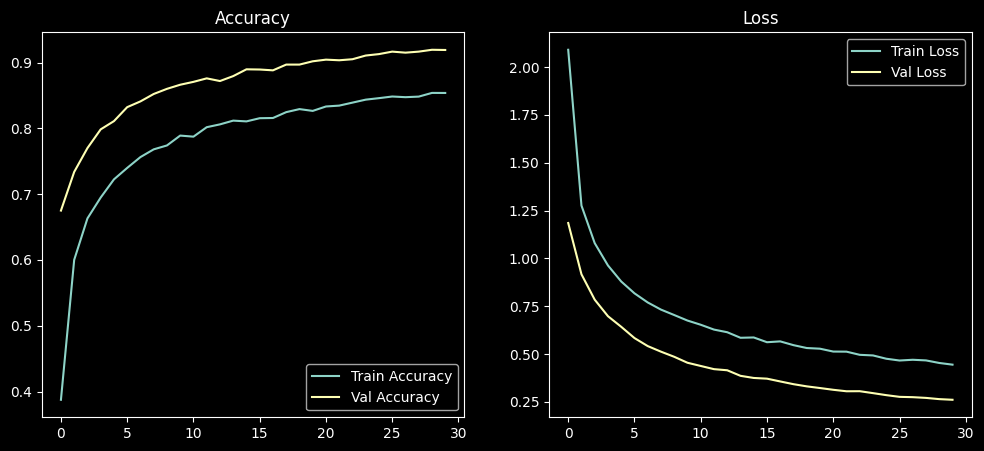

In [8]:
# 📈 Step 8: Plot Training Curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()

In [9]:
# 🔍 Step 9: Make Predictions (optional)
predictions = model.predict(X_test)
pred_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Decode class labels
pred_labels = le.inverse_transform(pred_classes)
true_labels = le.inverse_transform(true_classes)

# Show some predictions
for i in range(5):
    print(f"True: {true_labels[i]} | Predicted: {pred_labels[i]}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
True: T | Predicted: X
True: L | Predicted: L
True: A | Predicted: A
True: E | Predicted: E
True: Q | Predicted: Q
